In [3]:
import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import spikegen

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from MatplotDefault import plot_spk_cur_mem_spk

#### 入力電流の減衰
- 膜電位と同様に入力電流も減衰する
- 膜電位と入力電流の減衰率を以下に設定する
$$ \alpha = e^{-\Delta t/\tau_{\rm syn}}$$

$$ \beta = e^{-\Delta t/\tau_{\rm mem}}$$

- 最終的に決定されるモデルの式は以下のようになる


$$I_{\rm syn}[t+1]=\underbrace{\alpha I_{\rm syn}[t]}_\text{decay} + \underbrace{WX[t+1]}_\text{input}$$

$$U[t+1] = \underbrace{\beta U[t]}_\text{decay} + \underbrace{I_{\rm syn}[t+1]}_\text{input} - \underbrace{R[t]}_\text{reset}$$



In [6]:
alpha=0.9
beta=0.8 
num_steps=200

lif=snn.Synaptic(alpha=alpha,beta=beta)

- 入力にシナプス電流が加わった

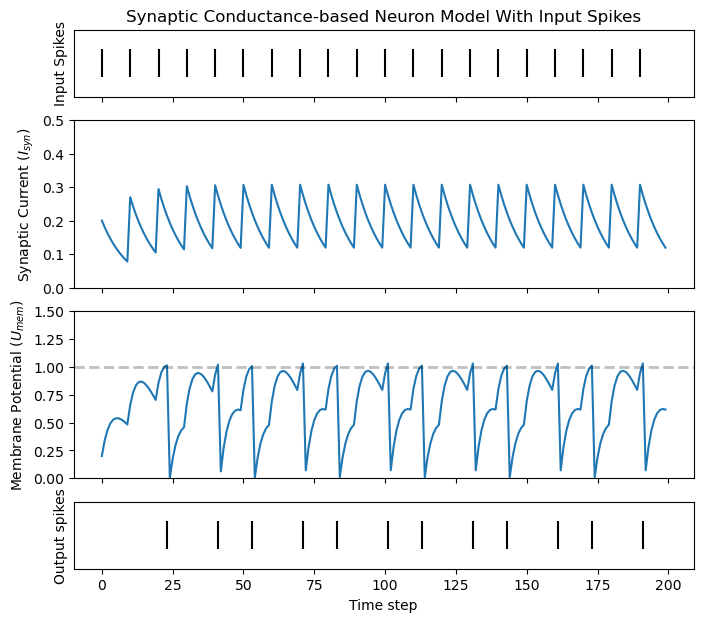

In [8]:
w = 0.2
spk_period = torch.cat((torch.ones(1)*w, torch.zeros(9)), 0)
spk_in = spk_period.repeat(20)

# Initialize hidden states and output
syn, mem = lif.init_synaptic()
spk_out = torch.zeros(1) 
syn_rec = []
mem_rec = []
spk_rec = []

# Simulate neurons
for step in range(num_steps):
    spk_out, syn, mem = lif(spk_in[step], syn, mem)
    spk_rec.append(spk_out)
    syn_rec.append(syn)
    mem_rec.append(mem)

# convert lists to tensors
spk_rec = torch.stack(spk_rec)
syn_rec = torch.stack(syn_rec)
mem_rec = torch.stack(mem_rec)

plot_spk_cur_mem_spk(spk_in, syn_rec, mem_rec, spk_rec, 
                    "Synaptic Conductance-based Neuron Model With Input Spikes")

#### 一連の変換の図示

1. スパイクをシナプス前細胞から受け取る
1. スパイクを入力電流に変換する
1. 入力電流から膜電位が変化する
1. 膜電位が変化した結果スパイクが発生する

<center>
<img src='https://github.com/jeshraghian/snntorch/blob/master/docs/_static/img/examples/tutorial2/2_7_stein.png?raw=true' width="500">
</center>

#### 2次のLIFニューロンと1次のLIFニューロンの使い分け
1. 入力データの時間依存関係が長い時間に渡る場合
1. 入力のスパイクがまばらな場合